# Task No-2 Unsupervised ML

## Author : Sangharsh patil 

### Importing libraries 

In [6]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

### Reading Data 

In [39]:
data= pd.read_csv("iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [40]:
df=data.iloc[:,[3,4]]
df

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [51]:
df.isnull().sum()

PetalLengthCm    0
PetalWidthCm     0
cluster          0
dtype: int64

### No of optimum cluster

In [41]:
wcss=[]
    
for k in range(1,10):
        km=KMeans(n_clusters=k, random_state=49)
        km.fit(df)
        wcss.append(km.inertia_)

### Elbow plot

Text(0, 0.5, 'Within sum of square')

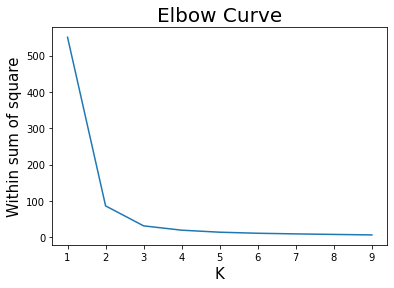

In [50]:
plt.plot(range(1,10),wcss)
plt.title("Elbow Curve", fontsize=20)
plt.xlabel("K", fontsize=15)
plt.ylabel("Within sum of square",fontsize=15)

In [29]:
km=KMeans(n_clusters=3,random_state=49)

In [42]:
y_pred=km.fit_predict(df)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 4, 8, 2, 2, 2, 3, 2, 8, 3, 8, 8, 2, 3, 2,
       2, 8, 2, 8, 4, 8, 4, 2, 8, 2, 2, 4, 2, 3, 8, 3, 8, 4, 2, 2, 2, 2,
       8, 8, 2, 2, 8, 3, 8, 8, 8, 8, 3, 8, 6, 4, 6, 0, 6, 5, 2, 5, 0, 6,
       7, 7, 7, 4, 7, 7, 0, 5, 5, 4, 6, 4, 5, 4, 6, 0, 4, 4, 6, 0, 0, 5,
       6, 4, 0, 6, 6, 0, 4, 7, 6, 7, 4, 6, 6, 7, 4, 7, 7, 4])

In [43]:
df['cluster']=y_pred

<ipython-input-43-3216ff8d760a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster']=y_pred


In [44]:
df

,PetalLengthCm,PetalWidthCm,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,7
146,5.0,1.9,4
147,5.2,2.0,7
148,5.4,2.3,7


In [45]:
df.cluster.unique()

array([1, 2, 4, 8, 3, 6, 0, 5, 7])

In [46]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

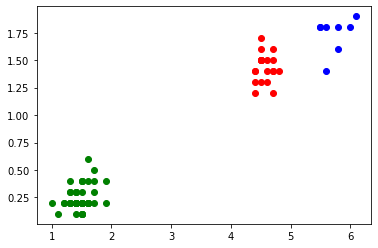

In [48]:
plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'],color='blue')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'],color='green')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'],color='red')